# China Eastern Airlines Flight 5735 (Zeran)

#### Load Python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

## Read [data](https://www.flightradar24.com/data/aircraft/b-1791) from Flightradar24

In [5]:
src = pd.read_csv("MU5735_2b367bc.csv")

In [19]:
src

,date,time,timestamp,altitude,speed,direction,latitude,longitude,geometry,flight
0,2022-03-21,05:16:53,1647839813,8400,183,227,25.08835,102.905052,POINT (102.90505 25.08835),China Eastern Airlines Flight 5735
1,2022-03-21,05:17:04,1647839824,8600,197,229,25.08197,102.896881,POINT (102.89688 25.08197),China Eastern Airlines Flight 5735
2,2022-03-21,05:17:19,1647839839,8875,211,230,25.073175,102.885353,POINT (102.88535 25.07317),China Eastern Airlines Flight 5735
3,2022-03-21,05:17:34,1647839854,9100,233,230,25.064301,102.873535,POINT (102.87354 25.06430),China Eastern Airlines Flight 5735
4,2022-03-21,05:17:44,1647839864,9300,242,230,25.056061,102.862495,POINT (102.86249 25.05606),China Eastern Airlines Flight 5735
5,2022-03-21,05:17:58,1647839878,9825,254,228,25.04557,102.84877,POINT (102.84877 25.04557),China Eastern Airlines Flight 5735
6,2022-03-21,05:18:08,1647839888,10475,249,231,25.037796,102.838562,POINT (102.83856 25.03780),China Eastern Airlines Flight 5735
7,2022-03-21,05:18:20,1647839900,11100,245,231,25.029789,102.827576,POINT (102.82758 25.02979),China Eastern Airlines Flight 5735
8,2022-03-21,05:18:36,1647839916,11875,249,219,25.017883,102.813416,POINT (102.81342 25.01788),China Eastern Airlines Flight 5735
9,2022-03-21,05:18:41,1647839921,12125,254,205,25.011122,102.809181,POINT (102.80918 25.01112),China Eastern Airlines Flight 5735


In [6]:
src.columns = src.columns.str.lower()

In [7]:
src["date"] = pd.to_datetime(src["utc"]).dt.date
src["time"] = pd.to_datetime(src["utc"]).dt.time

In [8]:
src[["latitude", "longitude"]] = src["position"].str.split(",", expand=True)

In [9]:
src = src[
    [
        "date",
        "time",
        "timestamp",
        "altitude",
        "speed",
        "direction",
        "latitude",
        "longitude",
    ]
].sort_values("time")

In [10]:
geo_df = gpd.GeoDataFrame(
    src, geometry=gpd.points_from_xy(src["longitude"], src["latitude"])
)

In [11]:
geo_df["flight"] = "China Eastern Airlines Flight 5735"

In [12]:
geo_df["date"] = geo_df["date"].astype(str)

#### There's a 30-minute gap in the flight transponder, so we'll create two lines

In [13]:
after = geo_df[geo_df["timestamp"] > 1647840425]

In [14]:
before = geo_df[geo_df["timestamp"] <= 1647840425]

In [15]:
before_lines = (
    before.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

In [16]:
after_lines = (
    after.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

<AxesSubplot:>

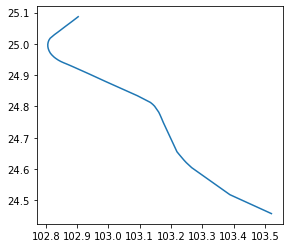

In [17]:
before_lines.plot()

## Export 

In [18]:
src.to_csv("../../usc/data/geo/china-eastern-crash-points.csv", index=False)
after_lines.to_file(
    "../../usc/data/geo/china-eastern-crash-lines-after.geojson", driver="GeoJSON"
)
before_lines.to_file(
    "../../usc/data/geo/china-eastern-crash-lines-before.geojson", driver="GeoJSON"
)

FileNotFoundError: [Errno 2] No such file or directory: '../../usc/data/geo/china-eastern-crash-points.csv'